<h1 style="background-color: #4CAF50; color: #f2f2f2; text-align: center; padding: 20px;">ANALYSIS OF HEALTH INSURANCE COST</h1>


# Overview of the data

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

# Dataset Description

- age: age of the primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

- children: number of children covered by health insurance, number of dependents

- smoker: smoking or not

- region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

- health_insurance_cost: individual medical costs billed by health insurance

<div style="background-color: #FFD700; color: #000; padding: 20px;">
    <h2 style="text-align: center;">Section 3 - ML Algorithms Analysis</h2>
</div>


# Question 1-
What method will you use for machine learning-based predictions of health insurance price?

For machine learning-based predictions of health insurance prices, I would use regression algorithms. Since health insurance prices are continuous variables, regression models are suitable for predicting them. Some common regression algorithms that could be used for this purpose include:

- Linear Regression: This simple and interpretable model assumes a linear relationship between the input features and the target variable.

- Random Forest Regression: This ensemble learning algorithm can capture complex nonlinear relationships in the data and handle interactions between features.

- Gradient Boosting Regression: This ensemble method builds multiple weak learners sequentially, each correcting the errors of its predecessor, and can yield highly accurate predictions.

- Support Vector Regression (SVR): SVR is a powerful algorithm for regression tasks, especially when dealing with high-dimensional data and nonlinear relationships.

- XGBoost Regression: XGBoost is an efficient and scalable implementation of gradient boosting that often performs well in regression problems.

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install openpyxl-if not able to open excel file

#Loading the Excel Dataset
df=pd.read_excel("Health_insurance_cost.xlsx")
df.head(2)


#Getting the basic information of the dataset
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Data Exploration

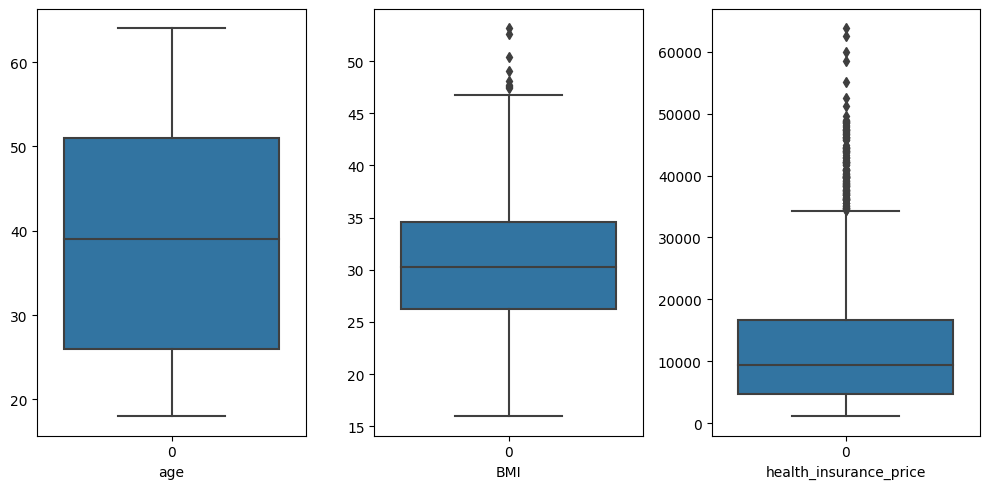

In [2]:
#Checking for outliers
vals=["age","BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()


#Outliers in ["BMI","health_insurance_price"]

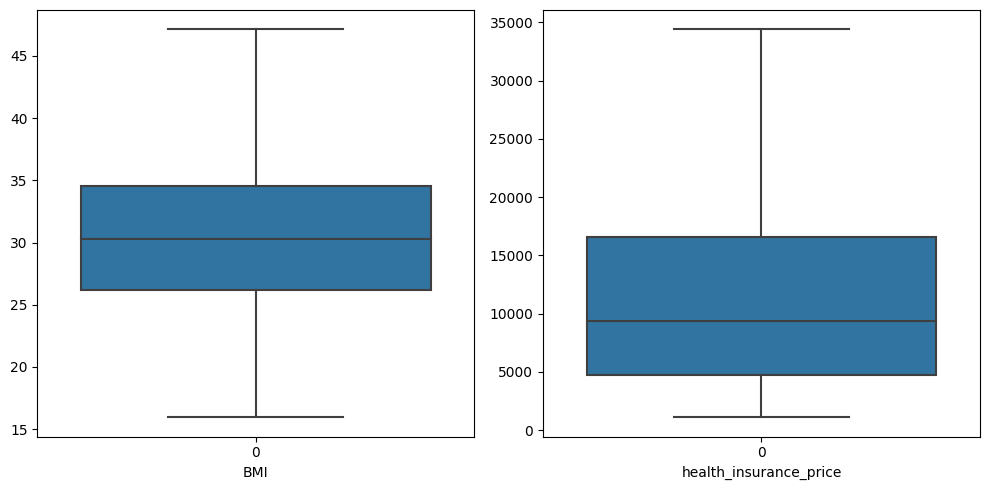

In [3]:
#Fixing the Outliers

for feature in ["BMI","health_insurance_price"]:
    q1=df[feature].quantile(.25)
    q3=df[feature].quantile(.75)
    iqr=q3-q1
    
    lower_lim=q1-(1.5)*iqr
    upper_limit=q3+(1.5)*iqr
    
    df[feature]=df[feature].clip(lower_lim,upper_limit)

#Checking for outliers
vals=["BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()

In [4]:
#Finding the missing values
df.isnull().sum()

#missing value cols=["age","BMI","health_insurance_price"]

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [5]:
#filling the missing values
df["age"]=df["age"].fillna(df["age"].mean())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["health_insurance_price"]=df["health_insurance_price"].fillna(df["health_insurance_price"].mean())

In [6]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [35]:
# Data analysis part is done in section 2- of this project

In [7]:
#encoding = [gender,smoking_status,location]

df=pd.get_dummies(df,columns=["gender","smoking_status","location"],drop_first=True)
df.head(2)

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.623559,0,16884.9240,0,1,0,0,1
1,18.0,33.770000,1,1725.5523,1,0,0,1,0


In [8]:
#Scaling the numbers between 0 and 1

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled = sc.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns=df.columns)


In [9]:
#Training -Testing-Splitting the data
X=scaled_df.drop(columns=["health_insurance_price"])
y=scaled_df["health_insurance_price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)


# Question2-
Justify the most appropriate model.

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Training the model
gbr.fit(x_train, y_train)

# Making predictions on the test set
y_pred = gbr.predict(x_test)

# Evaluation of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.1739107422172898
Mean Absolute Error: 0.23008144743939954
R-squared: 0.8347540410629718


In [37]:
#Applying Different ML Models along with Gradient Boosting Regressor for comparisions

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression":GradientBoostingRegressor(),
    "XG Boost Regression":XGBRegressor(),
    "Support Vector Regression": SVR()
}

results = {}
for name, model in models.items():
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[("model", model)])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"Mean Squared Error": mse, "Mean Absolute Error": mae, "R-squared": r2}

# Compare the performance of each model
results_df = pd.DataFrame(results)
print(results_df)

# Selection of the best-performing model
best_model = results_df.idxmin(axis=1)["Mean Squared Error"]
print("Best Model:", best_model)


#Here also Gradient Boosting Regressor has performed best among other ML Models with lower mean_sq_error and more accuracy


                     Linear Regression  Random Forest Regression  \
Mean Squared Error            0.233044                  0.190623   
Mean Absolute Error           0.331655                  0.230778   
R-squared                     0.778567                  0.818875   

                     Decision Tree Regression  Gradient Boosting Regression  \
Mean Squared Error                   0.368801                      0.174198   
Mean Absolute Error                  0.263511                      0.231067   
R-squared                            0.649574                      0.834482   

                     XG Boost Regression  Support Vector Regression  
Mean Squared Error              0.218405                   0.191410  
Mean Absolute Error             0.257851                   0.214791  
R-squared                       0.792476                   0.818127  
Best Model: Gradient Boosting Regression


# Graphical Implementation of the Cost Functions

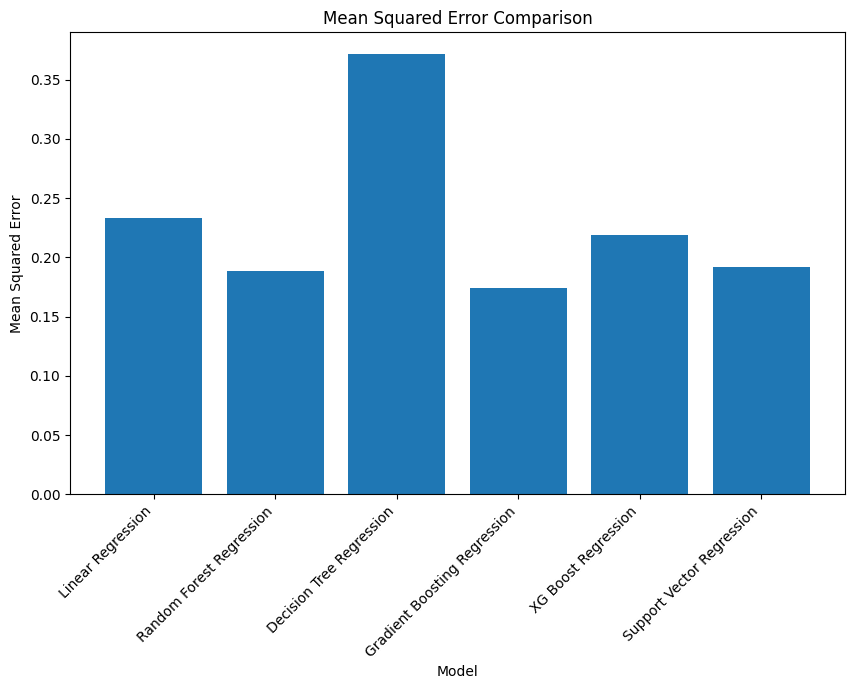

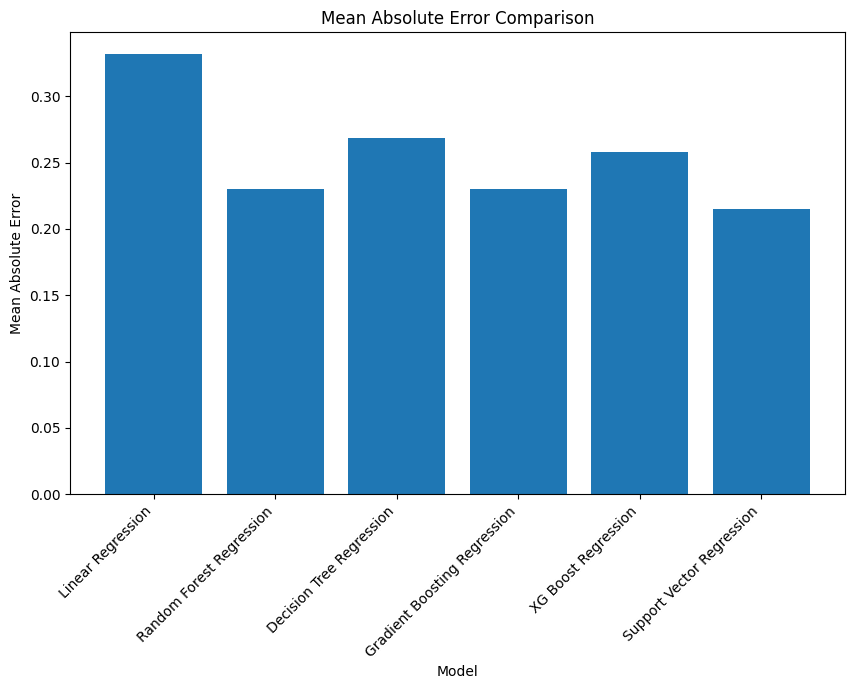

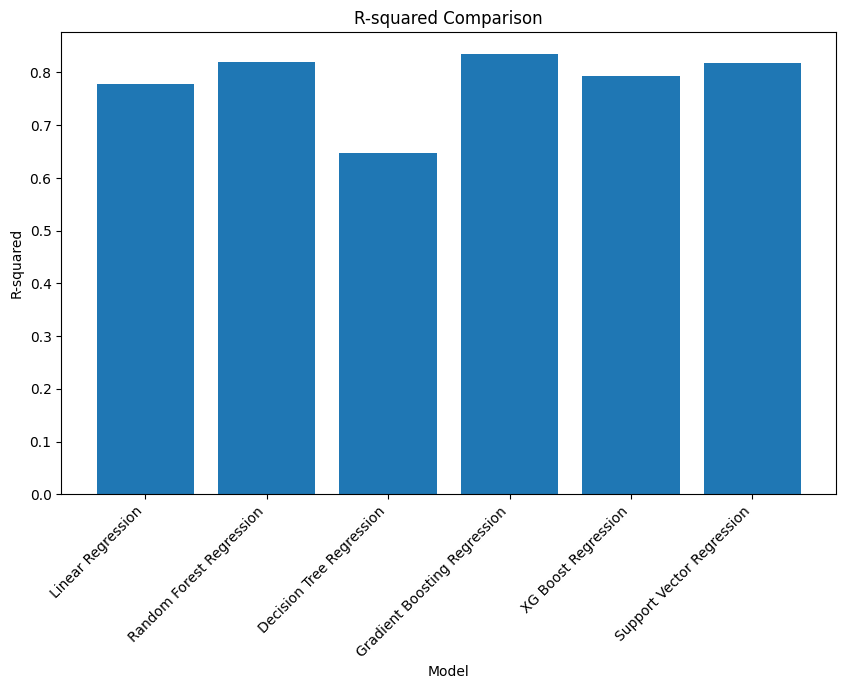

In [15]:
# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["Mean Squared Error"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["Mean Absolute Error"])
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Plotting R-squared (R2)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["R-squared"])
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.title("R-squared Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Question 3-

Perform the necessary steps required to improve the accuracy of your model.

- Lets Check if we use Grid_search_cv for cross validation and feature selection method will Gradient Boosting Regressor will perform better?

In [22]:
from sklearn.model_selection import GridSearchCV

# Step 1: Load the dataset
# Step 2: Preprocess the data
# Step 3: Perform feature engineering if necessary
# Step 4: Split the dataset into training and testing sets
# Step 5: Hyperparameter Tuning
# Define the parameter grid to search

 
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}



# Instantiate the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Step 6: Train the model with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params, random_state=0)
best_gb_regressor.fit(x_train, y_train)

# Step 7: Evaluate the model
y_pred_train = best_gb_regressor.predict(x_train)
y_pred_test = best_gb_regressor.predict(x_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)



Train Mean Squared Error: 0.1627450844793549
Test Mean Squared Error: 0.17385756014301912


# Using Feature Selection Technique to improve the accuracy

In [23]:
from sklearn.feature_selection import SelectFromModel

# Fit the Gradient Boosting Regressor model
gb_regressor.fit(x_train, y_train)

# Get feature importances
feature_importances = gb_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_top_features = 5
selected_features_indices = indices[:num_top_features]
selected_features = x_train.columns[selected_features_indices]

# Create a new dataset with selected features
X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

# Train the Gradient Boosting Regressor model with selected features
gb_regressor.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = gb_regressor.predict(X_test_selected)

# Calculate the mean squared error
mse_selected = mean_squared_error(y_test, y_pred_selected)
print("Mean Squared Error (with feature selection):", mse_selected)


Mean Squared Error (with feature selection): 0.17396434688978868


# Question 4-
- Do compare all models (at least four models).

# Feature Selection with other models

In [47]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define a function to perform feature selection for a given regressor model
def perform_feature_selection(regressor, x_train, y_train, x_test, y_test):
    # Perform feature selection using SelectKBest with f_regression
    selector = SelectKBest(score_func=f_regression, k=5)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)
    
    # Train the model with selected features
    regressor.fit(x_train_selected, y_train)
    
    # Make predictions
    y_pred_selected = regressor.predict(x_test_selected)
    
    # Calculate the mean squared error
    mse_selected = mean_squared_error(y_test, y_pred_selected)
    
    return mse_selected

# Define the regressor models
regressor_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR(kernel="linear"),
    "XGBoost Regressor": XGBRegressor()
}

# Perform feature selection for each regressor model
for name, regressor in regressor_models.items():
    print(f"Performing feature selection for {name}...")
    
    mse_selected = perform_feature_selection(regressor, x_train, y_train, x_test, y_test)
    
    
    print(f"Mean Squared Error (with feature selection) for {name}: {mse_selected}")


Performing feature selection for Decision Tree Regressor...
Mean Squared Error (with feature selection) for Decision Tree Regressor: 0.38061594395988674
Performing feature selection for Random Forest Regressor...
Mean Squared Error (with feature selection) for Random Forest Regressor: 0.197805069553344
Performing feature selection for SVR...
Mean Squared Error (with feature selection) for SVR: 0.2418758459053814
Performing feature selection for XGBoost Regressor...
Mean Squared Error (with feature selection) for XGBoost Regressor: 0.23575662544308146



<div style="background-color: #FFA500; padding: 20px;">
    <h2 style="color: #222222; text-align: left;">Conclusion</h2>
    <ul style="color: #444444;">
        <li>Even after applying feature selection and cross-validation, Gradient Boosting Regressor consistently outperformed other models for health insurance price prediction.</li>
        <li>Gradient Boosting Regressor stands out due to its ensemble nature, robustness to overfitting, and high predictive power.</li>
        <li>By combining weak learners iteratively, it captures complex relationships in data, making it suitable for diverse datasets.</li>
        <li>Its ability to handle different data types and provide feature importances adds to its appeal, making it a preferred choice for regression tasks.</li>
        <li>Overall, Gradient Boosting Regressor offers superior performance compared to other algorithms, making it a go-to option for predictive modeling.</li>
    </ul>
</div>





In [51]:
#For better visual representation please use jupyter notebook. Thank You!